## Generador de problemes

Al bloc de codi següent, pots modificar el tipus d'epístasi per observar les proporcions resultants d'un creuament entre dos individus doblement heterozigots per a dos loci. Les opcions vàlides per la variable `Epistasi` són: 'dihybrid' (sense epístasi), 'simple.recessive', 'simple.dominant', 'double.recessive', 'double.dominant' i 'double.dominant.recessive'.

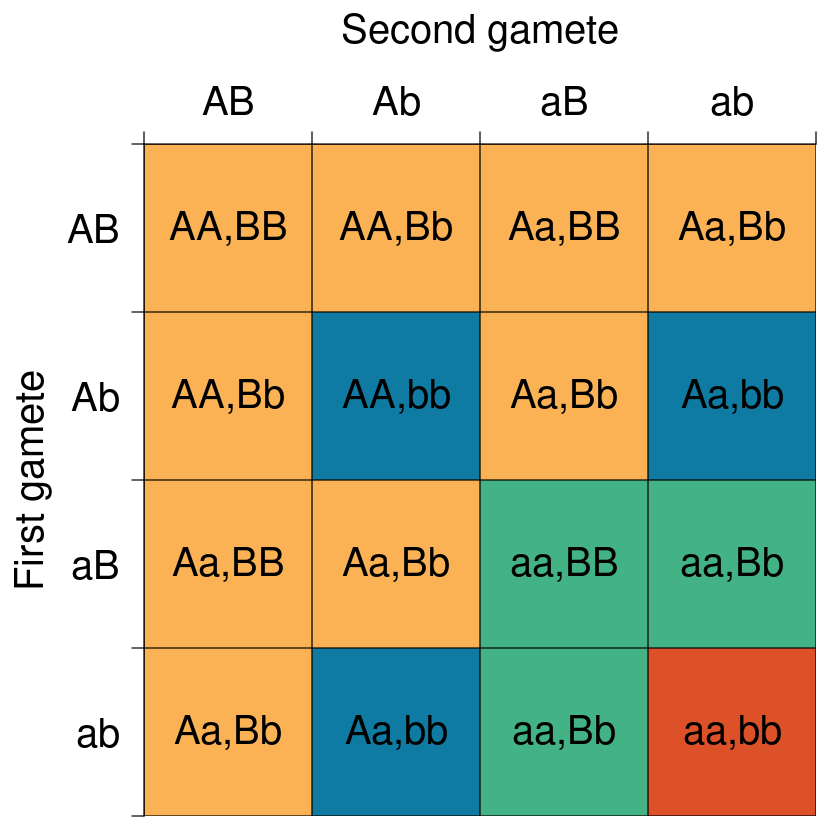

In [1]:
source('../scripts/mendel.R')
mascle  <- diploid(list(c('A','a'), c('B', 'b')))
femella <- diploid(list(c('A','a'), c('B', 'b')))
creuament  <- mascle * femella
Epistasi <- 'dihybrid'
punnet(creuament, map = Epistasi)

Cada vegada que executes el codi següent, trobaràs un resultat diferent de nombre d'individus descendents d'un creuament dihíbrid de cada un dels fenotips possibles. El codi escull a l'atzar un tipus d'epístasi. Pots modificar el nombre total de descendents, `N`. 

Descendents
  0   1   3 
112  95 293 

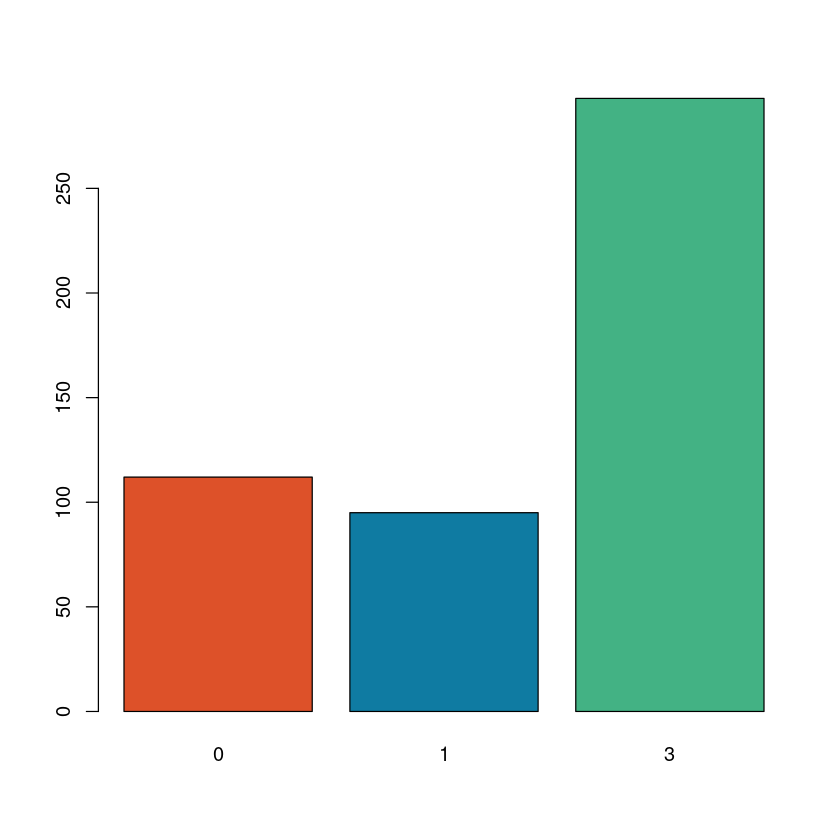

In [4]:
N <- 500
opcions <- c('dihybrid', 'simple.recessive', 'simple.dominant',
              'double.recessive', 'double.dominant', 'double.dominant.recessive')
Epistasi <- sample(opcions, 1)
creuament <- mascle * femella
Descendents <- sample(phenotype(creuament, map = Epistasi), N, replace = TRUE)
table(Descendents)
barplot(table(Descendents), col = MetBrewer::met.brewer('Egypt', 4))

Proposa una hipòtesi del tipus d'epístasi implicada i comprova-la amb un test de la $\chi^2$. En R pots calcular el valor $p$ de l'estadístic $X$ sense haver de recórrer a una taula de valors crítics. Per exemple, suposa que has obtingut 472 descendents de fenotip 1 i 28 de fenotip 2 en la F$_2$ d'un creuament entre dues varietats diferents de plantes. Sospites que 472:28 se sembla a una proporció 15:1, típica d'una epístasi doble dominant. 

In [3]:
Observats <- c(28, 472)
Esperats  <- 500 * c(1/16, 15/16)
X <- sum(((Observats - Esperats) ^ 2) / Esperats)
X

[1] 0.3605333

Per saber si $X$ és significativament major d'allò esperat per casualitat, la comparem amb la distribució $\chi^2_1$, perquè hem calculat $X$ amb un únic grau de llibertat. La funció `pchisq()` ens dóna la resposta:

In [4]:
pchisq(X, df = 1, lower.tail = FALSE)

[1] 0.5482102

Per estar més segurs, visualitzem el valor del nostre estadístic en la distribució:

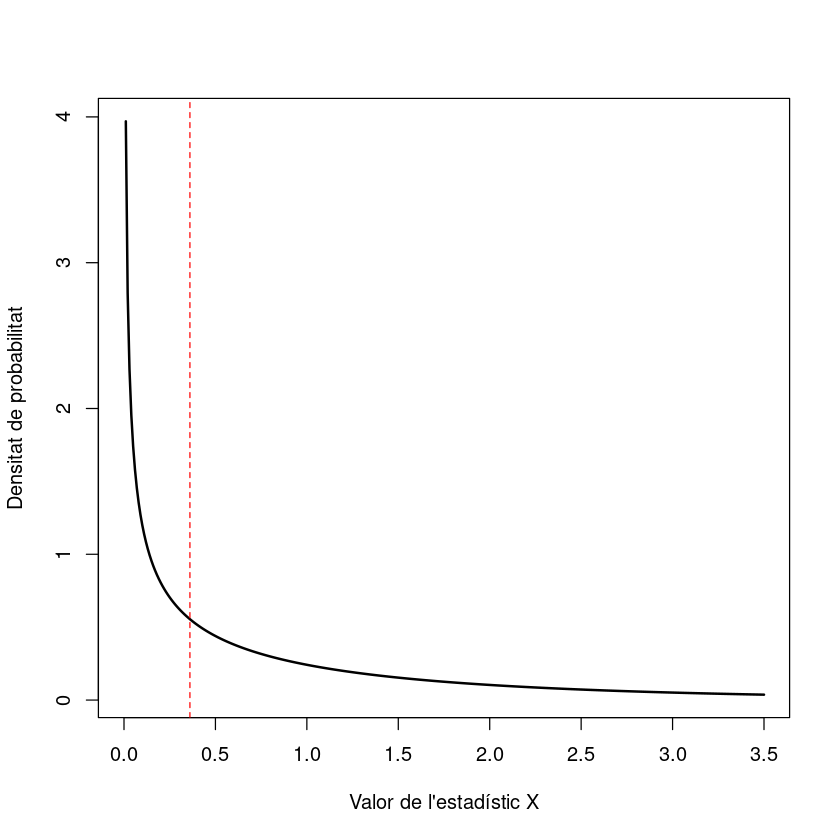

In [5]:
x <- seq(from = 0, to = 3.5, by = 0.01)
y <- dchisq(x, df = 1)
plot(x, y, type = 'l', lwd = 2, xlab = "Valor de l'estadístic X", ylab = 'Densitat de probabilitat')
abline(v = X, lty = 2, col = 'red')